<a href="https://colab.research.google.com/github/cpti372/study_ml/blob/master/%5Btensorflow_tuto1%5DClassifying_Images_of_Clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 학습 데이터를 불러온다. **

In [ ]:
!pip install -U tensorflow_datasets


     |████████████████████████████████| 3.4MB 7.5MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


2. 필요한 라이브러리 불러오기 


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals 

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


3. **데이터** **불러오기** 

In [ ]:
fashion_mnist =keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

4. **데이터 전처리 시작하기** 
전처리 시 픽셀 값 [0,255]를 [0,1] 의 범위로 변경하는데 주목 

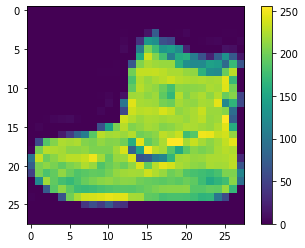

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images= train_images/255.0
test_images =test_images/255.0

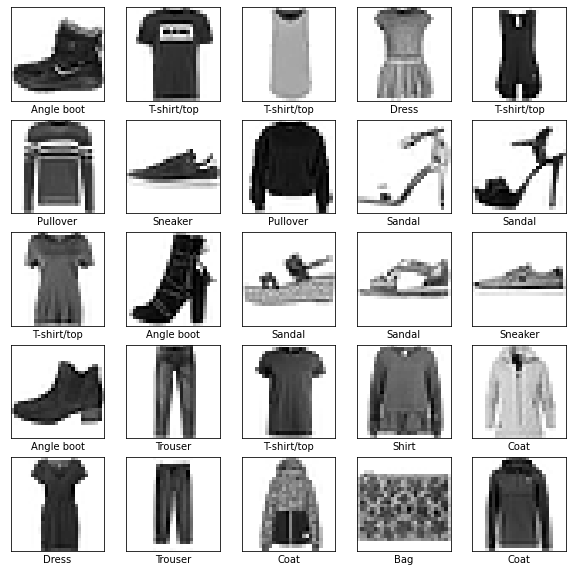

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

5. **신경망 모델 구성하기 **

층 설정하기 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

모델 컴파일하기 

In [ ]:
 model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

신경망 모델 훈련하기 
1. 훈련 데이터를 모델에 주입한다. 
2. 모델이 이미지와 레이블을 매핑하는 방법을 배운다. 
3. 테스트 세트에 대한 모델의 예측을 만든다. 이 예에서는 test_images 배열이다. 이게 test_labels 랑 맞는지 
4.model.fit하면 훈련데이터를 학습한다. 

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4984 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3744 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2944 - accuracy: 0.8901


테스트 세트에서의 성능 비교하기

In [ ]:
test_loss , test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 0s - loss: 0.3554 - accuracy: 0.8736
0.8736000061035156


예측 만들기

In [ ]:
predictions= model.predict(test_images)

In [ ]:
predictions[0]

array([1.7442440e-05, 1.6389100e-08, 8.2106538e-07, 1.6256195e-08,
       1.9151675e-07, 4.0011853e-03, 9.8099599e-06, 1.4812429e-02,
       4.3111600e-06, 9.8115379e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

0번째 원소의 이미지, 예측, 신뢰도 점수 배열 

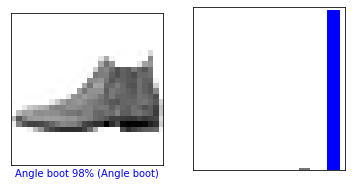

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

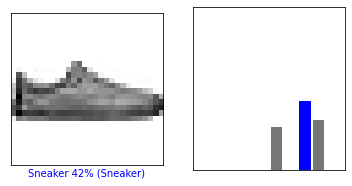

In [ ]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

올바르게 예측된 레이블은 파란색, 아닌건 빨간색 
신뢰도 점수가 높아도 잘못 예측할 수 있다. 

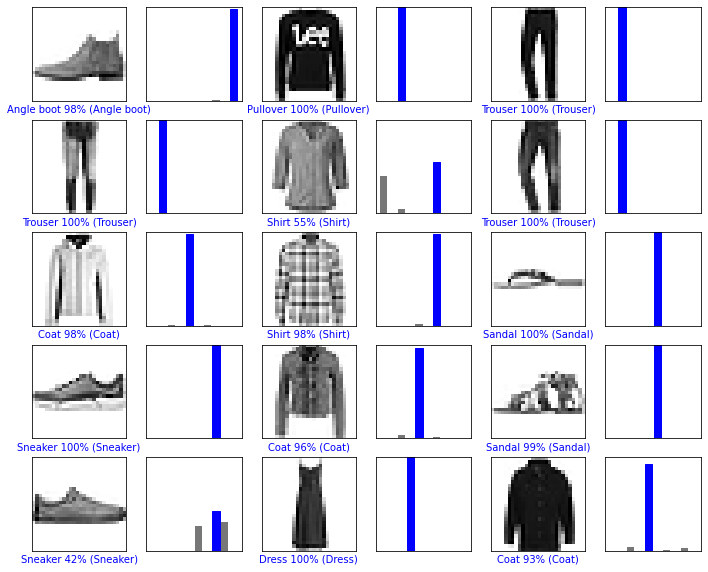

In [ ]:
num_rows=5
num_cols=3
num_images=num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
img=test_images[0]
print(img.shape)

(28, 28)
